# **FINAL PROJECT 3** - Ensemble

Kelompok 8 - PYTN 012
- DWI PUJINING TYAS
- NUR ANISAH
- FATIMAH ZAHRA

## Perkenalan

Penyakit kardiovaskular atau cardiovascular disease (CVDs) adalah penyakit yang berkaitan dengan jantung dan pembuluh darah. Penyakit ini menjadi penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. 

Kumpulan data ini berisi 12 fitur yang digunakan untuk memprediksi apakah pasien selamat atau tidak dari penyakit gagal jantung. 

## Import Libraries

In [ ]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

# For Data Exploration
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest as ztest

#For Transform Data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from numpy import exp

# For Evaluation
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


## Data Loading

In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

## EDA & Visualization

### **1. Categorical Features**

### Death Event Percentage

In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

(-1.1198839000517573,
 1.1452675353838286,
 -1.112524974860086,
 1.128514679178454)

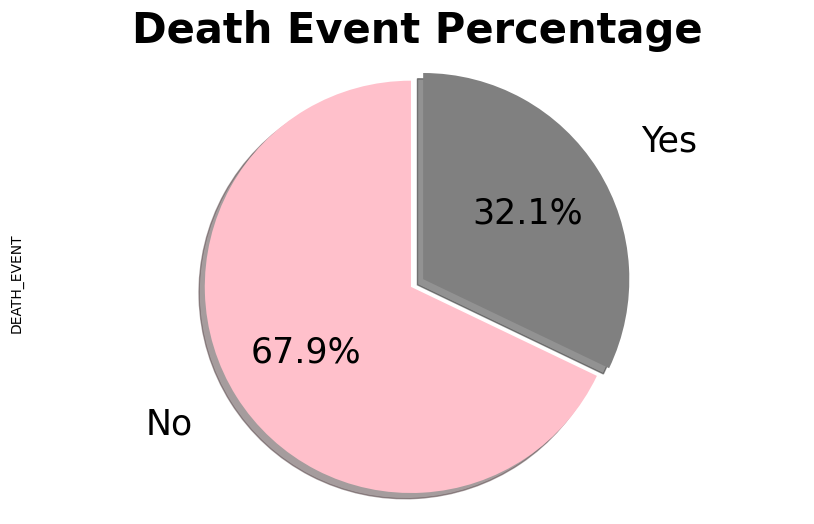

In [ ]:
lable=['No', 'Yes']
color_list = ["pink", "grey"]
explode_list = [0.02, 0.05]

ax = plt.axes()
ax.set_facecolor("black")

df['DEATH_EVENT'].value_counts().plot(
    kind='pie'
    ,figsize=(10,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 25,'color':'black'}
)

plt.title('Death Event Percentage', fontsize=30, weight='bold')
plt.axis('equal')


Berdasarkan visualisasi data diatas menunjukkan bahwa kematian terbesar bukan berasal dari penyakit gagal jantung dengan persentase sebesar 67.9%

### Death Event Based on Diabetes

In [ ]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
death_diabet = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
death_diabet = [death_diabet[0] / sum(death_diabet) * 100, death_diabet[1] / sum(death_diabet) * 100]
death_diabet

[58.333333333333336, 41.66666666666667]

(-1.1226977064969248,
 1.1516679573925186,
 -1.1060821068942912,
 1.113846809056522)

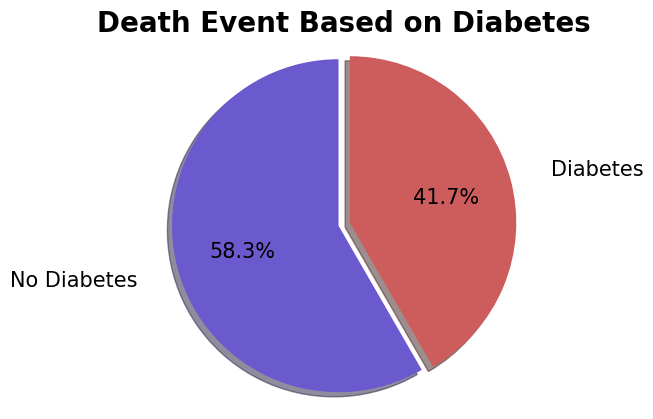

In [ ]:
lable=['No Diabetes', 'Diabetes']
color_list = ['slateblue', 'indianred']
explode_list = [0.02, 0.05]

plt.subplot()
plt.pie(death_diabet
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 15,'color':'black'}
)

plt.title('Death Event Based on Diabetes', fontsize=20, weight='bold')
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa:
  - Terdapat 174 pasien yang tidak memiliki riwayat diabetes dan 125 pasien memiliki riwayat diabetes
  - Sebanyak 58.3% pasien yang tidak memiliki diabetes dan  41.7% pasien yang memiliki diabetes tidak bertahan atau meninggal dunia
  - Sebagian besar penyebab kematian pasien tidak disebabkan oleh penyakit diabetes

#### Chi-Squared Test

Interpretation:
- H0 = Diabetes dan Death Event tidak saling bergantung (Independen)
- H1 = Terdapat ketergantungan antara Diabetes dan Death Event

alpha = 0.05

In [ ]:
crosstab_diabet = pd.crosstab(df["diabetes"], df["DEATH_EVENT"])
crosstab_diabet

DEATH_EVENT,0,1
diabetes,,
0,118,56
1,85,40


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_diabet)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.000, p=1.000
Probability Independent


Kesimpulan:
- Nilai statistik pada pengujian variabel diabetes dan death event sebesar 0.000 menunjukkan bahwa tidak ada perbedaan yang signifikan antara data observasi dan harapan hipotesis nol. 
- Nilai p sebesar 1.000 menunjukkan bahwa probabilitas mendapatkan nilai statistik yang ekstrem atau lebih ekstrem sebesar 1.000 jika hipotesis nol benar. Nilai p yang tinggi menunjukkan bahwa kita tidak memiliki cukup bukti untuk menolak hipotesis nol.
- "Probability Independent" menunjukkan bahwa berdasarkan hasil uji chi-square, tidak ada hubungan yang signifikan antara dua variabel yang diuji.

Dengan demikian, kita dapat menyimpulkan bahwa tidak ada hubungan yang signifikan antara variabel Diabetes dan Death Event yang diuji berdasarkan uji chi-square dengan nilai statistik 0.000 dan nilai p 1.000.

### Death Event Based on Anemia

In [ ]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [ ]:
death_anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
death_anaemia = [death_anaemia[0] / sum(death_anaemia) * 100, death_anaemia[1] / sum(death_anaemia) * 100]
death_anaemia

[52.083333333333336, 47.91666666666667]

(-1.123449556151848, 1.1533847068113872, -1.1015365745630075, 1.10349904515255)

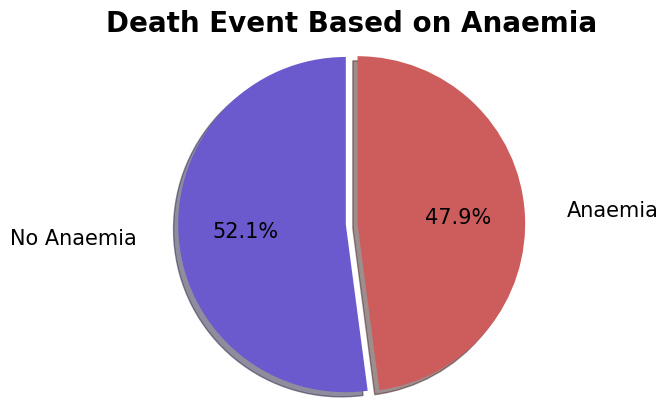

In [ ]:
lable=['No Anaemia', 'Anaemia']
color_list = ['slateblue', 'indianred']
explode_list = [0.02, 0.05]

plt.subplot()
plt.pie(death_anaemia
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 15,'color':'black'}
)

plt.title('Death Event Based on Anaemia', fontsize=20, weight='bold')
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa:
  - Terdapat 170 pasien yang tidak mengalami pengurangan hemoglobin dan 129 pasien mengalami pengurangan hemoglobin
  - Sebanyak 52.1% pasien yang tidak mengalami anemia dan 47.9% pasien yang mengalami anemia tidak bertahan atau meninggal dunia
  - Sebagian besar penyebab kematian pasien tidak disebabkan oleh anemia

#### Chi-Squared Test

Interpretation:

- H0 = Anemia dan Death Event tidak saling bergantung (Independen)
- H1 = Terdapat ketergantungan antara Anemia dan Death Event

alpha = 0.05

In [ ]:
crosstab_anemia = pd.crosstab(df["anaemia"], df["DEATH_EVENT"])
crosstab_anemia

DEATH_EVENT,0,1
anaemia,,
0,120,50
1,83,46


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_anemia)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=1.042, p=0.307
Probability Independent


Kesimpulan: 
- Nilai statistik sebesar 1.042 menunjukkan sejauh mana data observasi kita berbeda dari harapan hipotesis nol. Nilai statistik tersebut menunjukkan adanya perbedaan yang lebih besar antara data observasi dan harapan hipotesis nol.
- Nilai p sebesar 0.307 menunjukkan probabilitas mendapatkan nilai statistik yang ekstrem atau lebih ekstrem sebesar 0.307 jika hipotesis nol benar.
- "Probability Independent" menunjukkan bahwa berdasarkan hasil uji chi-square, tidak ada hubungan yang signifikan antara dua variabel yang diuji.

Dengan demikian, kita dapat menyimpulkan bahwa tidak ada hubungan yang signifikan antara variabel Anemia dan Death Event yang diuji berdasarkan uji chi-square dengan nilai statistik = 1.042 dan nilai p = 0.307.

### Death Event Based on High Blood Pressure

In [ ]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [ ]:
death_hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
death_hbp = [death_hbp [0] / sum(death_hbp ) * 100,death_hbp [1] / sum(death_hbp ) * 100]
death_hbp 

[59.375, 40.625]

(-1.122486619007971,
 1.1511876489603823,
 -1.1068210726092302,
 1.115530200837578)

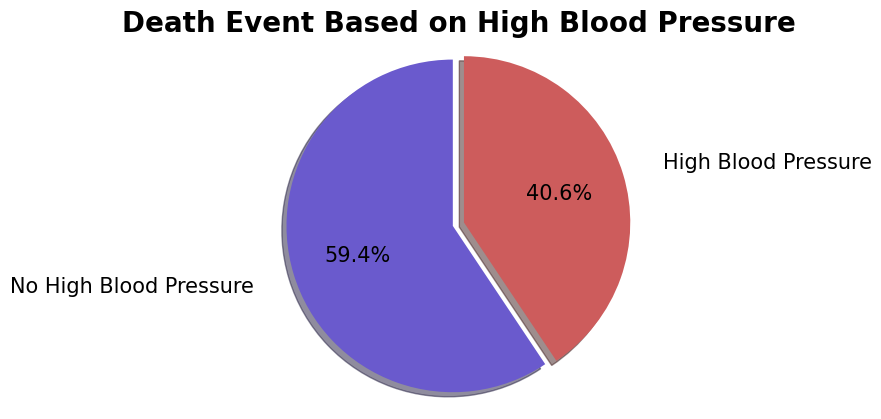

In [ ]:
lable=['No High Blood Pressure', 'High Blood Pressure']
color_list = ['slateblue', 'indianred']
explode_list = [0.02, 0.05]

plt.subplot()
plt.pie(death_hbp
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 15,'color':'black'}
)

plt.title('Death Event Based on High Blood Pressure', fontsize=20, weight='bold')
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa:
  - Terdapat 194 pasien yang tidak memiliki darah tinggi dan 105 pasien memiliki darah tinggi
  - Sebanyak 59.4% pasien yang tidak memiliki darah tinggi dan 40.6% pasien yang memiliki darah tinggi tidak bertahan atau meninggal dunia
  - Sebagian besar penyebab kematian pasien tidak disebabkan oleh darah tinggi

#### Chi-Squared Test

Interpretation:

- H0 = High Blood Pressure dan Death Event tidak saling bergantung (Independen) 
- H1 = Terdapat ketergantungan antara High Blood Pressure dan Death Event

alpha = 0.05

In [ ]:
crosstab_hbp = pd.crosstab(df["high_blood_pressure"], df["DEATH_EVENT"])
crosstab_hbp

DEATH_EVENT,0,1
high_blood_pressure,,
0,137,57
1,66,39


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_hbp)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=1.543, p=0.214
Probability Independent


Kesimpulan: 
- Nilai statistik sebesar 1.543 menunjukkan sejauh mana data observasi kita berbeda dari harapan hipotesis nol. Nilai statistik tersebut menunjukkan adanya perbedaan yang lebih besar antara data observasi dan harapan hipotesis nol.
- Nilai p sebesar 0.214 menunjukkan probabilitas mendapatkan nilai statistik yang ekstrem atau lebih ekstrem sebesar 0.214 jika hipotesis nol benar. Nilai p yang tinggi menunjukkan bahwa kita tidak memiliki cukup bukti untuk menolak hipotesis nol.
- "Probability Independent" menunjukkan bahwa berdasarkan hasil uji chi-square, tidak ada hubungan yang signifikan antara dua variabel yang diuji.

Dengan demikian, kita dapat menyimpulkan bahwa tidak ada hubungan yang signifikan antara variabel high blood pressure dan variabel death event yang diuji berdasarkan uji chi-square dengan nilai statistik = 1.543 dan nilai p = 0.214.

### Death Event Based on Smoking

In [ ]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [ ]:
death_smoke = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
death_smoke = [death_smoke[0] / sum(death_smoke) * 100,death_smoke[1] / sum(death_smoke) * 100]
death_smoke

[68.75, 31.25]

(-1.1195393990641314,
 1.1444831478061073,
 -1.1130552301321215,
 1.1297229755454135)

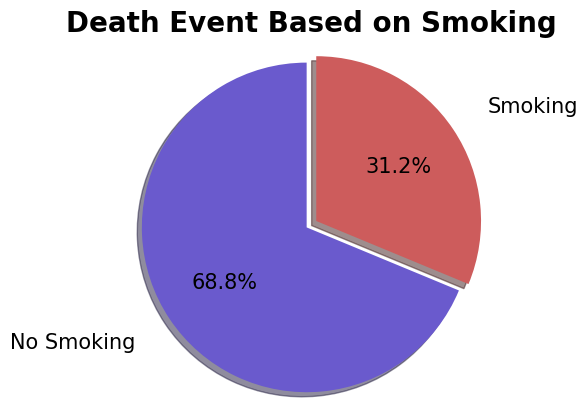

In [ ]:
lable=['No Smoking', 'Smoking']
color_list = ['slateblue', 'indianred']
explode_list = [0.02, 0.05]

plt.subplot()
plt.pie(death_smoke
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 15,'color':'black'}
)

plt.title('Death Event Based on Smoking', fontsize=20, weight='bold')
plt.axis('equal')

Berdasarkan visualisasi di atas, dapat diketahui bahwa:
  - Terdapat 203 pasien tidak merokok dan 96 pasien merokok
  - Sebanyak 68.8% pasien yang tidak merokok dan 31.2% pasien yang merokok tidak bertahan atau meninggal dunia
  - Sebagian besar penyebab kematian pasien tidak disebabkan oleh merokok

#### Chi-Squared Test

Interpretation:

- H0 = Smoking dan Death Event tidak saling bergantung (Independen)
- H1 = Terdapat ketergantungan antara Smoking dan Death Event

alpha = 0.05

In [ ]:
crosstab_smoking = pd.crosstab(df["smoking"], df["DEATH_EVENT"])
crosstab_smoking

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_smoking)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.007, p=0.932
Probability Independent


Kesimpulan: 
- Nilai statistik sebesar 0.007 menunjukkan sejauh mana data observasi kita berbeda dari harapan hipotesis nol. Nilai statistik tersebut menunjukkan bahwa data observasi kita hampir tidak berbeda dari harapan hipotesis nol.
- nilai p sebesar 0.932 menunjukkan probabilitas mendapatkan nilai statistik yang ekstrem atau lebih ekstrem sebesar 0.932 jika hipotesis nol benar. Nilai p tersebut menunjukkan bahwa kita tidak memiliki cukup bukti untuk menolak hipotesis nol.
- "Probability Independent" menunjukkan bahwa berdasarkan hasil uji chi-square, tidak ada hubungan yang signifikan antara dua variabel yang diuji.

Dengan demikian, kita dapat menyimpulkan bahwa tidak ada hubungan yang signifikan antara variabel smoking dan variabel death event yang diuji berdasarkan uji chi-square dengan nilai statistik = 0.007 dan nilai p = 0.932.



### Death Event Based on Sex


In [ ]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [ ]:
death_sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
death_sex = [death_sex[0] / sum(death_sex) * 100,death_sex[1] / sum(death_sex) * 100]
death_sex

[35.41666666666667, 64.58333333333334]

(-1.1210757583619786,
 1.1479825688285623,
 -1.123661900810912,
 1.1103937571369378)

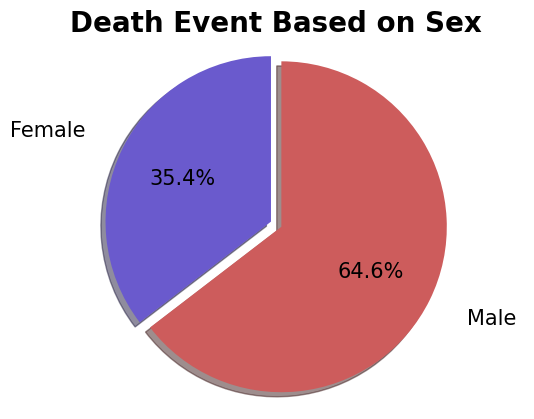

In [ ]:
lable=['Female', 'Male']
color_list = ['slateblue', 'indianred']
explode_list = [0.02, 0.05]

plt.subplot()
plt.pie(death_sex
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=lable
    ,labeldistance = 1.25
    ,explode=explode_list
    ,colors=color_list
    ,textprops={'fontsize': 15,'color':'black'}
)

plt.title('Death Event Based on Sex', fontsize=20, weight='bold')
plt.axis('equal')

#### Chi-Squared Test

Interpretation:

- H0 = Sex dan Death Event tidak saling bergantung (Independen)
- H1 = Terdapat ketergantungan antara Sex dan Death Event

alpha = 0.05

In [ ]:
crosstab_sex = pd.crosstab(df["sex"], df["DEATH_EVENT"])
crosstab_sex

DEATH_EVENT,0,1
sex,,
0,71,34
1,132,62


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_sex)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.000, p=1.000
Probability Independent


Kesimpulan:
- Nilai statistik pada pengujian variabel diabetes dan death event sebesar 0.000 menunjukkan bahwa tidak ada perbedaan yang signifikan antara data observasi dan harapan hipotesis nol. 
- Nilai p sebesar 1.000 menunjukkan bahwa probabilitas mendapatkan nilai statistik yang ekstrem atau lebih ekstrem sebesar 1.000 jika hipotesis nol benar. Nilai p yang tinggi menunjukkan bahwa kita tidak memiliki cukup bukti untuk menolak hipotesis nol.
- "Probability Independent" menunjukkan bahwa berdasarkan hasil uji chi-square, tidak ada hubungan yang signifikan antara dua variabel yang diuji.

Dengan demikian, kita dapat menyimpulkan bahwa tidak ada hubungan yang signifikan antara variabel Smoking dan Death Event yang diuji berdasarkan uji chi-square dengan nilai statistik 0.000 dan nilai p 1.000.

### **2. Numerical Features**






### Death Event Based on Age

In [ ]:
df[['age', 'DEATH_EVENT']].groupby('DEATH_EVENT').mean()

,age
DEATH_EVENT,
0,58.758621
1,65.208333


In [ ]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", hover_data=df.columns,
                   title ="DEATH_EVENT Based on Age", 
                   labels={"age": "Age"},
                   template="ggplot2",
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa : 
  - Rata-rata usia pasien yang masih bertahan adalah 58 tahun, sedangkan rata-rata usia pasien yang meninggal adalah 65 tahun
  - jumlah pasien yang meninggal tertinggi berada pada rentang usia 60-64 tahun. 
  - Jumlah pasien yang bertahan banyak ditemui pada usia 45-74 tahun

#### Uji Z atau Z-test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean sampel dan mean populasi pada Age dan Death Event 
- H1 = Ada perbedaan signifikan pada Age dan Death Event

In [ ]:
ztest_Score, p_value = ztest(df['age'], df['DEATH_EVENT'], alternative="larger")
print("Z-VALUE: " + str(ztest_Score))
print("P-VALUE: " + str(p_value))

if(p_value < 0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")


Z-VALUE: 87.89238694942541
P-VALUE: 0.0
Reject Null Hypothesis


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :
- Skor z-value sebesar 87.89238694942541, dengan begitu nilai z-value menyatakan sangat tinggi, menunjukkan bahwa pengamatan kita jauh berbeda dari mean.
- P-value adalah 0.0, yang menunjukkan bahwa probabilitas mendapatkan hasil yang sedemikian ekstrem sangatlah rendah.
- Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan atau hubungan yang signifikan antara variabel Age dan Death Event 

### Death Event Based on Serum Creatinine

In [ ]:
sc = df.groupby(["DEATH_EVENT"]).serum_creatinine.agg(["mean"])
sc

,mean
DEATH_EVENT,
0,1.184877
1,1.835833


In [ ]:
fig = px.box(df, x="serum_creatinine", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of  Serum Creatinine vs DEATH_EVENt", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa 
  - Pasien yang memiliki level serum creatinine di darah sekitar 0.5-1.6 mg/dl dengan rata-rata sebesar 1.184877 mg/dl memiliki potensi untuk bertahan
  - Pasien yang memiliki level serum creatinine di darah sekitar 0.6-3.0 dengan rata-rata sebesar 1.835833 mg/dl berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada serum creatinine dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada serum creatinine dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['serum_creatinine'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=16.340, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 16.340 yang menunjukkan bahwa pengamatan kita jauh berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa probabilitas mendapatkan hasil yang sedemikian ekstrem sangatlah rendah.
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan sigbifikan antara mean pada serum creatinine dan Death Event

### Death Event Based on Serum Sodium

In [ ]:
ss = df.groupby(["DEATH_EVENT"]).serum_sodium.agg(["mean"])
ss

,mean
DEATH_EVENT,
0,137.216749
1,135.375000


In [ ]:
fig = px.box(df, x="serum_sodium", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of  Serum Sodium vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa 
  - Pasien yang memiliki level serum sodium di darah sekitar 130-145 mEq/L dengan rata-rata sebesar 137.216749 mEq/L memiliki potensi untuk bertahan
  - Pasien yang memiliki level serum sodium di darah sekitar 127-146 dengan rata-rata sebesar 135.375 mEq/L berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada serum sodium dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada serum sodium dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['serum_sodium'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=531.174, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 531.174 yang menunjukkan bahwa pengamatan kita jauh berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa serum sodium memiliki distibusi yang berbeda dengan death event
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan signifikan antara mean pada serum sodium dan Death Event

### Death Event Based on Creatinine Phosphokinase

In [ ]:
cpk = df.groupby(["DEATH_EVENT"]).creatinine_phosphokinase.agg(["mean"])
cpk

,mean
DEATH_EVENT,
0,540.054187
1,670.197917


In [ ]:
fig = px.box(df, x="creatinine_phosphokinase", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of  Creatinine Phosphokinase vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa

  - Pasien yang memiliki level enzim cpk di darah sekitar 30-1211 mcg/L dengan rata-rata sebesar 540.054187 mcg/L memiliki potensi untuk bertahan
  - Pasien yang memiliki enzim cpk di darah sekitar 23-1199 mcg/L dengan rata-rata sebesar 670.197917  mcg/L berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada serum sodium dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada serum sodium dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['creatinine_phosphokinase'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=10.363, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 10.363 yang menunjukkan bahwa pengamatan kita berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa creatinine_phosphokinase memiliki distibusi yang berbeda dengan death event
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan mean yang signifikan antara mean pada creatinine phosphokinase dan Death Event

### Death Event Based on Platelets

In [ ]:
plts = df.groupby(["DEATH_EVENT"]).platelets.agg(["mean"])
plts

,mean
DEATH_EVENT,
0,266657.489901
1,256381.044792


In [ ]:
fig = px.box(df, x="platelets", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of  Platelets vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa

  - Pasien yang memiliki level enzim cpk di darah sekitar 105k-422k kiloplatelets/L dengan rata-rata sebesar 266657.489901 kiloplatelets/L memiliki potensi untuk bertahan
  - Pasien yang memiliki enzim cpk di darah sekitar 47k-461k kiloplatelets/L dengan rata-rata sebesar 256381.044792 berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada platelets dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada platelets dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['platelets'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=46.561, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 46.561 yang menunjukkan bahwa pengamatan kita berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa platelets memiliki distibusi yang berbeda dengan death event
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan antara mean pada platelets dan Death Event

### Death Event Based on Ejection Fraction

In [ ]:
ef = df.groupby(["DEATH_EVENT"]).ejection_fraction.agg(["mean"])
ef

,mean
DEATH_EVENT,
0,40.26601
1,33.46875


In [ ]:
fig = px.box(df, x="ejection_fraction", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of Ejection Fraction vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa

  - Pasien yang memiliki persentase darah meninggalkan jantung pada setiap kontraksi jantung sebesar 20%-60%  dengan rata-rata sebesar 40.26601%  memiliki potensi untuk bertahan
  - Pasien yang memiliki persentase darah meninggalkan jantung pada setiap kontraksi jantung sebesar 14%-55% dengan rata-rata sebesar 33.46875% berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada Ejection Fraction dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada Ejection Fraction dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['ejection_fraction'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=55.131, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 55.131 yang menunjukkan bahwa pengamatan kita berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa Ejection Fraction memiliki distibusi yang berbeda dengan death event
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan antara mean pada Ejection Fraction dan Death Event

### Death Event Based on Time

In [ ]:
time = df.groupby(["DEATH_EVENT"]).time.agg(["mean"])
time

,mean
DEATH_EVENT,
0,158.339901
1,70.885417


In [ ]:
fig = px.box(df, x="time", color="DEATH_EVENT", hover_data=df.columns,
                   title ="Box Plot of Time vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"},
                  )
fig.show()

Berdasarkan visualisasi diatas, dapat diketahui bahwa

  - Pasien dengan waktu follow-up sebanyak 12-285 hari dan rata-rata sebanyak 158 hari memiliki potensi untuk bertahan
  - Pasien yang memiliki waktu follow-up sebanyak 4-214 hari dan rata-rata sebanyak 71 hari berpotensi tidak akan selamat atau meninggal

#### T-Test

Interpretation:
- H0 = Tidak ada perbedaan signifikan antara mean pada Time dan Death Event 
- H1 = Ada perbedaan signifikan antara mean pada Time dan Death Event

In [ ]:
from scipy.stats import ttest_ind
stat, p= ttest_ind(df['time'], df['DEATH_EVENT'])
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability the same distribution')
else :
    print('Probability different distribution')

stat=28.949, p=0.000
Probability different distribution


Kita dapat mengintrepetasikan hasil diatas sebagai berikut :

  - Skor statistik sebesar 28.949 yang menunjukkan bahwa pengamatan kita berbeda dari mean.
  - P-value adalah 0.0, yang menunjukkan bahwa Time memiliki distibusi yang berbeda dengan death event
  - Dengan p-value yang sangat rendah, kita memiliki bukti yang cukup kuat untuk menolak hipotesis nol. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan antara mean pada Time dan Death Event

### Correlation

In [ ]:
df_numerical = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

In [ ]:
df_numerical

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75,582,20,265000.00,1.9,130,4
1,55,7861,38,263358.03,1.1,136,6
2,65,146,20,162000.00,1.3,129,7
3,50,111,20,210000.00,1.9,137,7
4,65,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62,61,38,155000.00,1.1,143,270
295,55,1820,38,270000.00,1.2,139,271
296,45,2060,60,742000.00,0.8,138,278
297,45,2413,38,140000.00,1.4,140,280


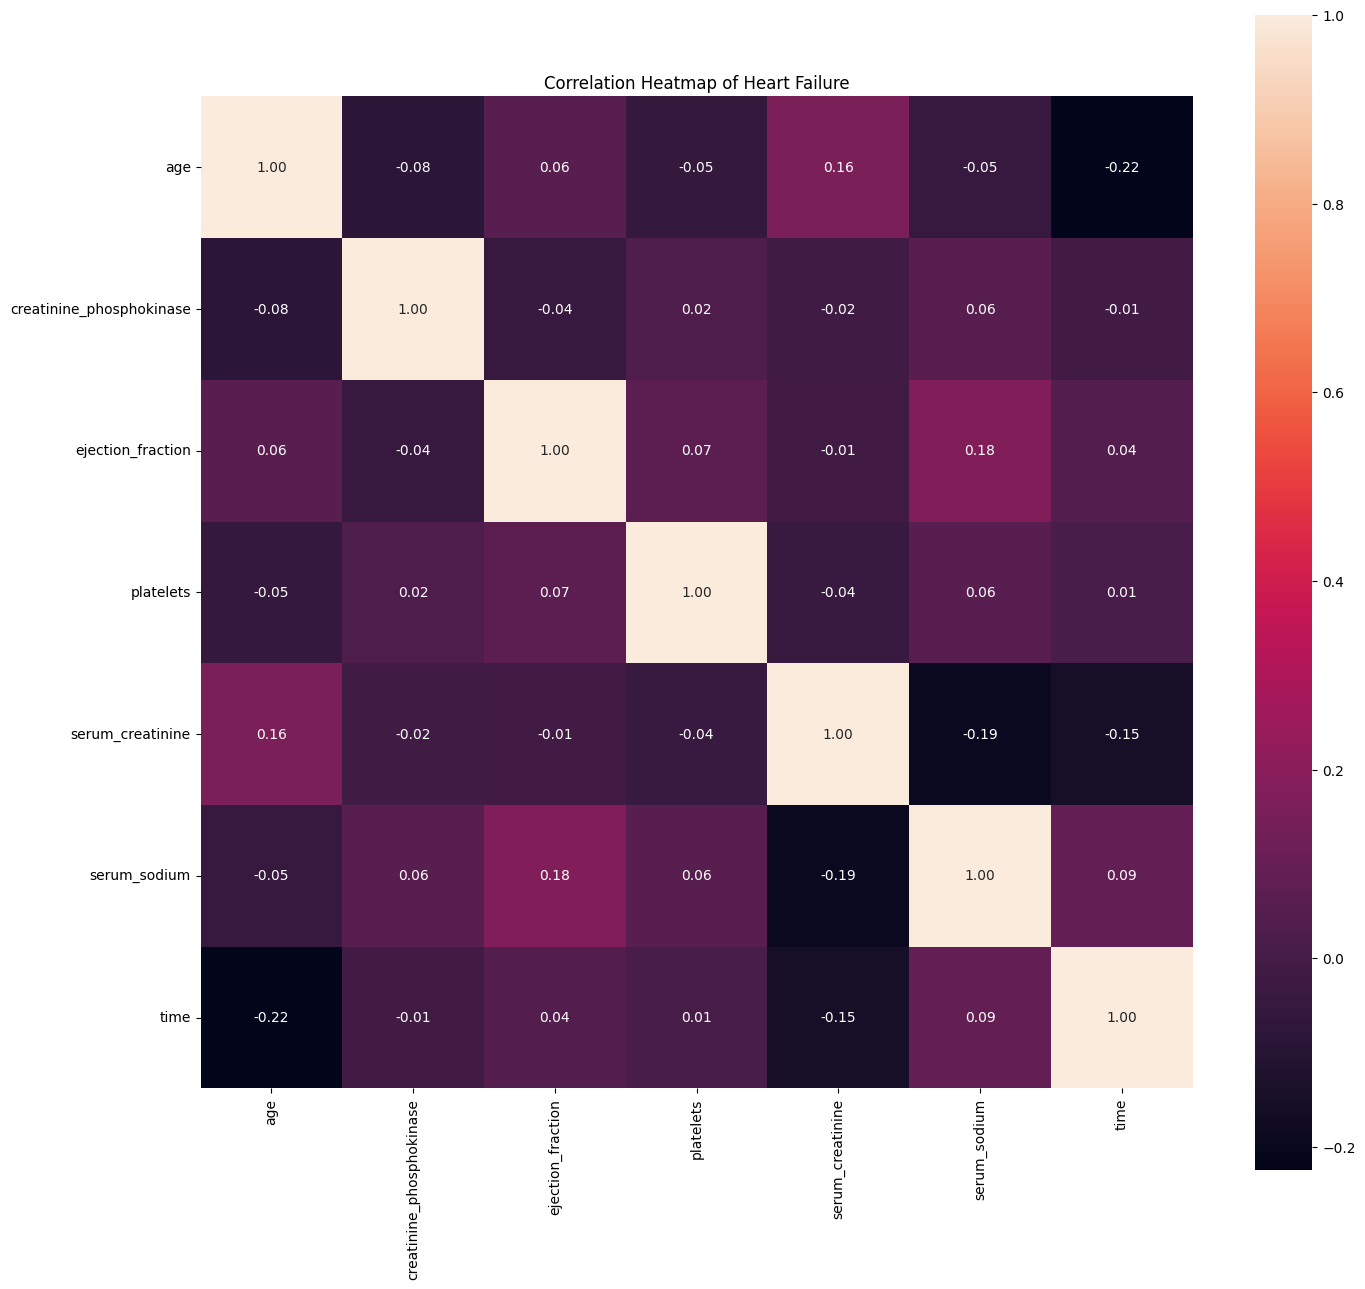

In [ ]:
plt.figure(figsize=(16,15))
plt.title('Correlation Heatmap of Heart Failure')
ax = sns.heatmap(df_numerical.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

In [ ]:
df_numerical.corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081406,0.060195,-0.052475,0.159237,-0.045912,-0.224265
creatinine_phosphokinase,-0.081406,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060195,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052475,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159237,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045912,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224265,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


Dapat dilihat pada tabel maupun visualisasi diatas menunjukkan hubungan antar kolom pada kolom numerical pada dataset. 

## Data Prepocessing

In [ ]:
df_copy=df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])
df_copy.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75,582,20,265000.00,1.9,130,4,1
1,55,7861,38,263358.03,1.1,136,6,1
2,65,146,20,162000.00,1.3,129,7,1
3,50,111,20,210000.00,1.9,137,7,1
4,65,160,20,327000.00,2.7,116,8,1


Berdasarkan hasil EDA di bab sebelumnya, dapat diketahui bahwa kolom kategorikal (anaemia, diabetes, high blood pressure, sex, dan smoking) tidak berpengaruh signifikan terhadap death event. Oleh karena itu, kolom-kolom tersebut tidak digunakan untuk permodelan 

### Feature Selection

In [ ]:
x = df_copy.drop(['DEATH_EVENT'], axis=1)
y = df_copy['DEATH_EVENT']

print(x.shape)
print(y.shape)

(299, 7)
(299,)


In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k=7)
x_new = bestfeatures.fit_transform(x, y)
names = x.columns.values[bestfeatures.get_support()]
scores = bestfeatures.scores_[bestfeatures.get_support()]
names_scores = list(zip(names, scores))
df_column = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
df_column

,Feat_names,F_Scores
0,age,20.410478
1,creatinine_phosphokinase,1.173259
2,ejection_fraction,23.094063
3,platelets,0.718880
4,serum_creatinine,28.158492
5,serum_sodium,11.765331
6,time,114.181264


In [ ]:
X_fit = df[['age','creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium', 'time']]


### Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.4, random_state=0, stratify=y)

### Transforming Data for Modelling

In [ ]:
pt = PowerTransformer(method='yeo-johnson')

X_train_transformed = pt.fit_transform(x_train)
X_test_transformed = pt.transform(x_test)

pd.DataFrame({'cols':x_train.columns , 'yeo-johnson': pt.lambdas_})

,cols,yeo-johnson
0,age,0.080080
1,creatinine_phosphokinase,-0.236593
2,ejection_fraction,0.455380
3,platelets,0.536975
4,serum_creatinine,-2.692576
5,serum_sodium,8.152934
6,time,0.652464


In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed ,columns=x_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed ,columns=x_test.columns)

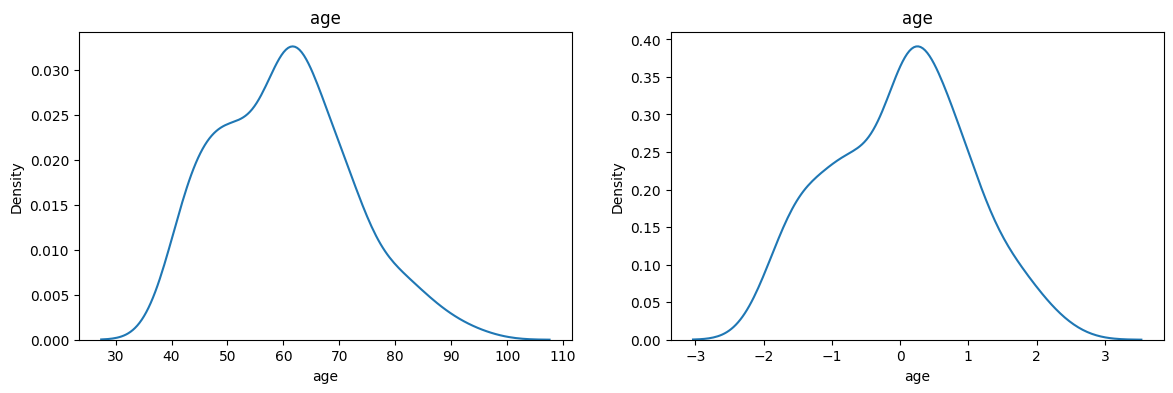

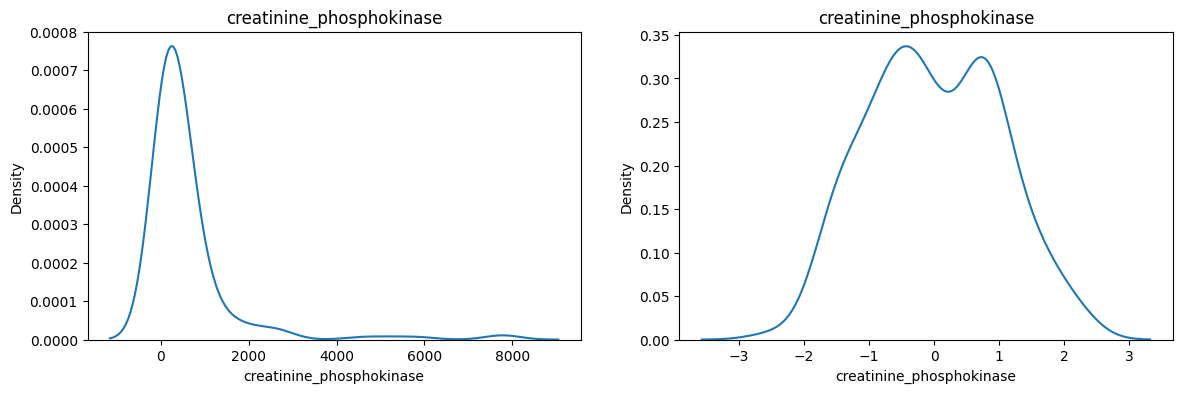

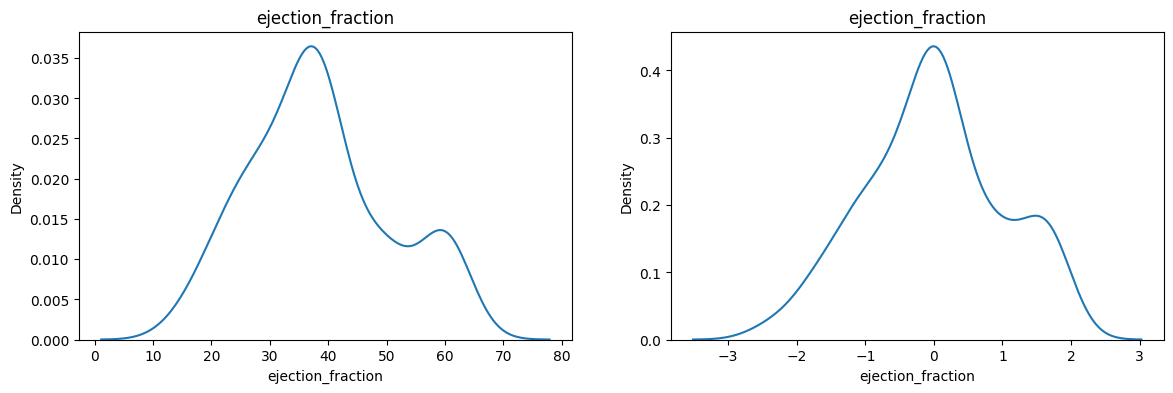

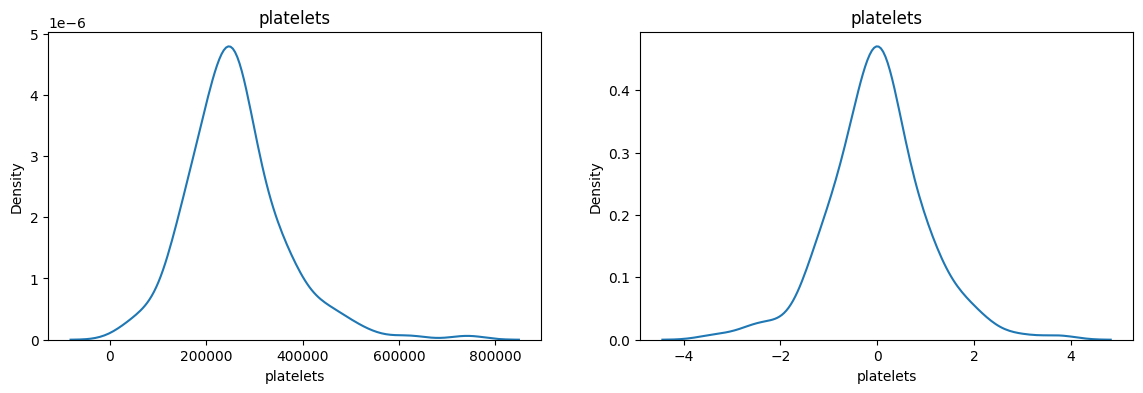

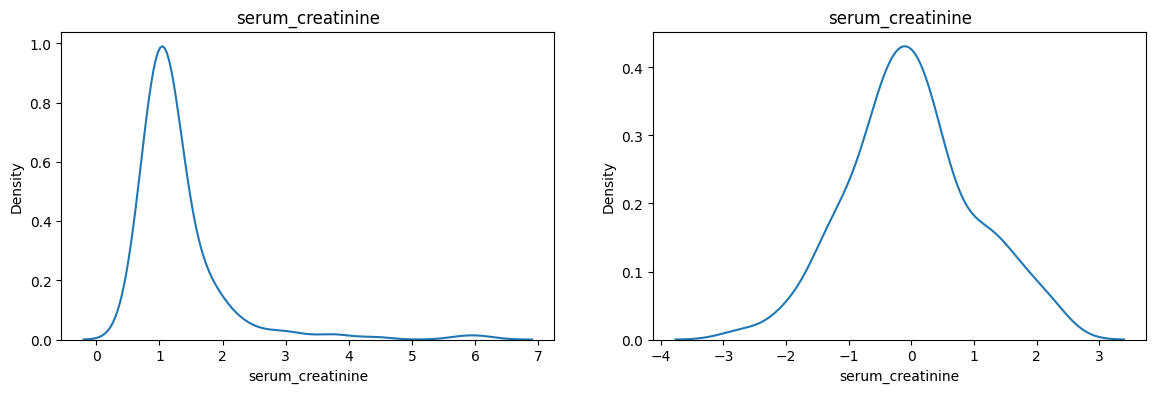

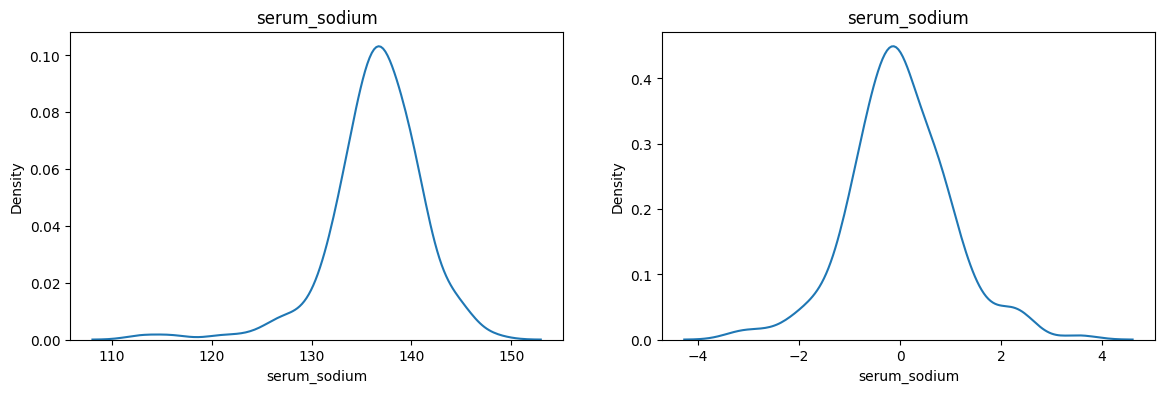

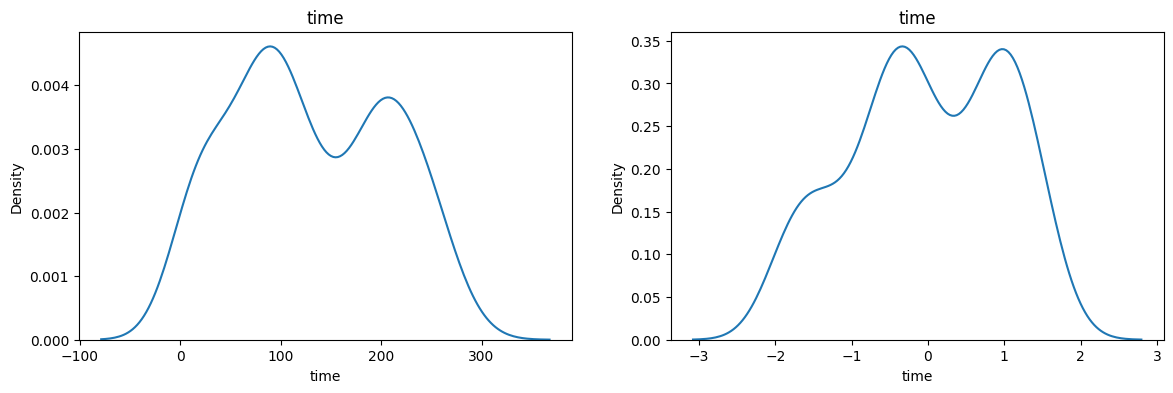

In [ ]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

## Modeling

#### **1. Metrik Evaluasi** 
Untuk mengevaluasi sejauh mana model mampu mengklasifikasikan data secara keseluruhan dengan benar, metrik yang sesuai adalah akurasi (accuracy). Dan untuk memperhatikan kemampuan model dalam membedakan antara kelas yang berbeda, seperti dalam kasus ini antara "no" dan "yes", metrik yang baik adalah AUC-ROC (Area Under the ROC Curve). 

Menggabungkan penggunaan akurasi dan AUC-ROC dapat memberikan informasi yang lebih komprehensif tentang performa model. Akurasi memberikan informasi tentang keseluruhan kebenaran prediksi, sementara AUC-ROC memberikan informasi tentang kemampuan model dalam membedakan antara kelas yang berbeda.

Jadi, untuk mendapatkan perspektif yang lebih lengkap, menggunakan akurasi dan AUC-ROC adalah pilihan yang baik.

In [ ]:
# Function evaluation
def plot_evaluation(y_true, y_pred, fpr, tpr, model_name, cmap='YlOrBr', color='red'):
    # Confusion Matrix
    CM = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=4.5)
    sns.heatmap(CM, annot=True, fmt=".0f", cmap=cmap, annot_kws={"fontsize": 12})
    plt.title("Confusion Matrix - {}\n(Accuracy Score: {:.3f})".format(model_name, accuracy_score(y_true, y_pred)), fontsize=17)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)

    # Plot ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}\n(ROC Score: {:.3f})'.format(model_name, auc(fpr, tpr)), fontsize=17)

    plt.tight_layout()
    plt.show()


### **2. Pemilihan Ensemble Model**
Ensemble model adalah pendekatan dalam machine learning yang menggabungkan beberapa model pembelajaran untuk meningkatkan kinerja prediksi. Ensemble model memanfaatkan prinsip bahwa gabungan dari beberapa model dapat menghasilkan prediksi yang lebih akurat dibandingkan dengan penggunaan model tunggal.

Ada 3 jenis ensemble model yang digunakan dalam prediksi kali ini, yaitu:
1. Bagging
2. Boosting
3. Stacking

## 1. Bagging Models


###  **1.1 Random Forest**
Model ini menggunakan sejumlah besar pohon keputusan yang dilatih secara independen pada subset acak dari data pelatihan. Pada model di bawah ini digunakan Random Forest sebanyak 50 pohon keputusan. Prediksi akhir didapatkan dengan menggabungkan hasil prediksi dari semua pohon. 

In [ ]:
RF = RandomForestClassifier(n_estimators=60, random_state=25)
RF.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=60, random_state=25)

In [ ]:
# Predict Model
y_pred_RF = RF.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score :", accuracy)

fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
print('ROC AUC Score: {}'.format(auc(fpr_RF, tpr_RF)))

Accuracy Score : 0.8666666666666667
ROC AUC Score: 0.8480531813865146


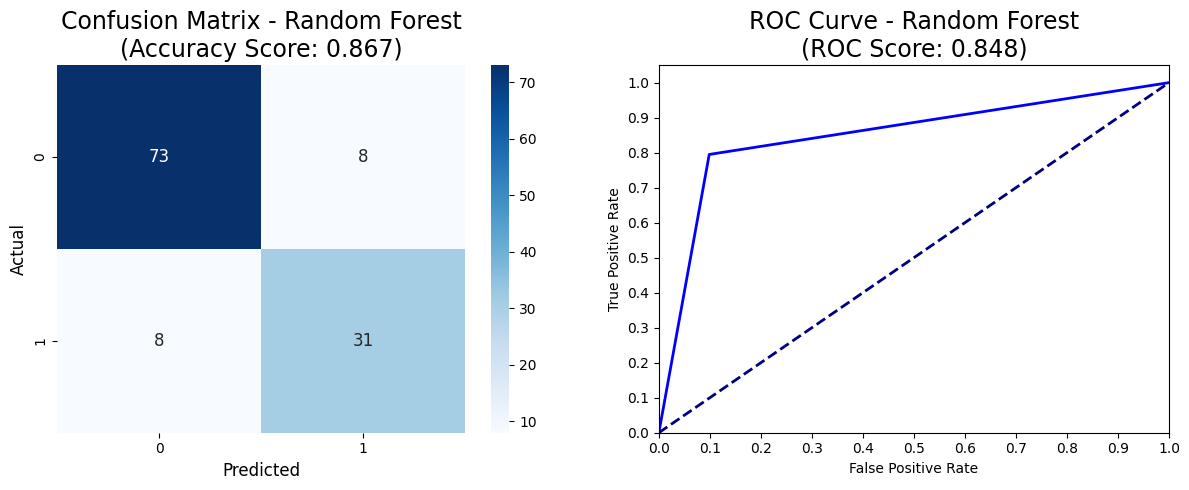

In [ ]:
model_name = "Random Forest"
plot_evaluation(y_test, y_pred_RF, fpr_RF, tpr_RF, model_name, cmap='Blues', color='blue')

Berdasarkan hasil evaluasi model menggunakan Random Forest, diperoleh nilai akurasi sebesar 0.867 dan nilai ROC AUC sebesar 0.848. 

Dalam hal ini, model Random Forest menunjukkan performa yang sangat baik dengan akurasi yang tinggi dan ROC AUC yang cukup tinggi. Hal ini mengindikasikan bahwa model tersebut efektif dalam mengklasifikasikan data dengan akurasi yang tinggi dan memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

### **1.2 Bagging Classifier**
Bagging Classifier ini adalah pendekatan umum yang menggunakan algoritma klasifikasi tertentu sebagai base estimator dan membangun banyak model dengan subset acak dari data pelatihan.

Keuntungan dari Bagging Classifier adalah dapat mengurangi varian dan overfitting, meningkatkan ketahanan terhadap data yang noisy, serta meningkatkan akurasi dan performa model secara keseluruhan. Dengan menggunakan Bagging Classifier, model dapat memanfaatkan kekuatan dari setiap model individu yang ada untuk menghasilkan prediksi yang lebih baik secara kolektif.

In [ ]:
bagging_model = BaggingClassifier(n_estimators=25)
bagging_model.fit(X_train_transformed, y_train)

BaggingClassifier(n_estimators=25)

In [ ]:
# Predict Model
y_pred_BM = bagging_model.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_BM)
print("Accuracy Score:", accuracy)

fpr_BM, tpr_BM, thresholds = roc_curve(y_test, y_pred_BM)
print('ROC AUC Score: {}'.format(auc(fpr_BM, tpr_BM)))

Accuracy Score: 0.825
ROC AUC Score: 0.8038936372269706


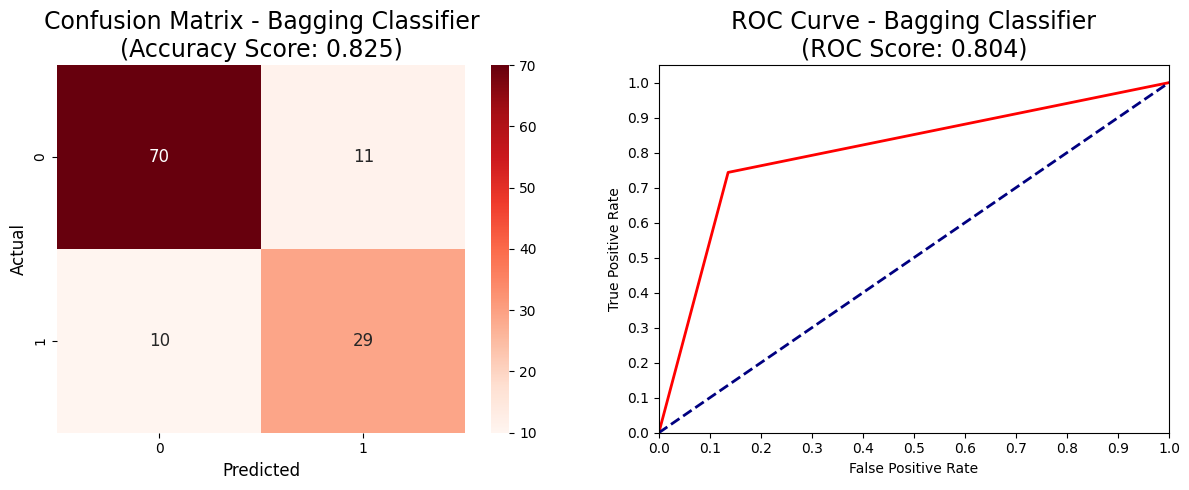

In [ ]:
model_name = "Bagging Classifier"
plot_evaluation(y_test, y_pred_BM, fpr_BM, tpr_BM, model_name, cmap='Reds', color='red')

Berdasarkan hasil evaluasi menggunakan metode Bagging Classifier, diperoleh nilai akurasi sebesar 0.825 dan nilai ROC AUC sebesar 0.804.

## 2. Boosting Models

Boosting adalah metode ensemble learning yang menggabungkan weak learners menjadi strong learners untuk meningkatkan kekuatan prediksi dengan mengurangi bias  

### **2.1 Gradient Boosting**
Model ini secara iteratif mempelajari kesalahan prediksi dari model sebelumnya dan mencoba memperbaikinya dengan membangun model berikutnya.

In [ ]:
GBM = GradientBoostingClassifier(learning_rate=0.1, random_state=10)
GBM.fit(X_train_transformed, y_train)

GradientBoostingClassifier(random_state=10)

In [ ]:
# Predict Model
y_pred_GBM = GBM.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_GBM)
print("Accuracy Score:", accuracy)

fpr_GBM, tpr_GBM, thresholds = roc_curve(y_test, y_pred_GBM)
print('ROC AUC Score: {}'.format(auc(fpr_GBM, tpr_GBM)))

Accuracy Score: 0.8416666666666667
ROC AUC Score: 0.8095916429249763


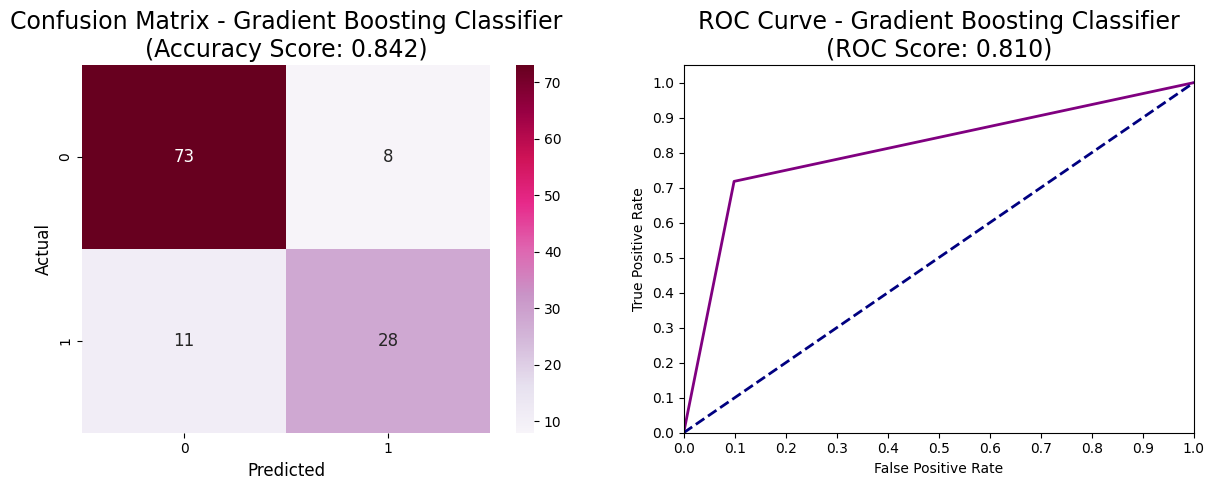

In [ ]:
model_name = "Gradient Boosting Classifier"
plot_evaluation(y_test, y_pred_GBM, fpr_GBM, tpr_GBM, model_name, cmap='PuRd', color='purple')

Berdasarkan hasil evaluasi model menggunakan Gradient Boosting, diperoleh nilai akurasi sebesar 0.842 dan nilai ROC AUC sebesar 0.8096. 

### **2.2 AdaBoost (Adaptive Boosting)**
Model ini membangun sekuensial beberapa model lemah (weak learner) seperti pohon keputusan dangkal. Setiap model diberi bobot berdasarkan kinerjanya dan prediksi akhir dihasilkan dengan menggabungkan prediksi dari semua model dengan bobot mereka.

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=40, learning_rate=0.1, random_state=25)
ada_model.fit(X_train_transformed, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=40, random_state=25)

In [ ]:
# Predict Model
y_pred_ABM = ada_model.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_ABM)
print("Accuracy Score:", accuracy)

fpr_ABM, tpr_ABM, thresholds = roc_curve(y_test, y_pred_ABM)
print('ROC AUC Score: {}'.format(auc(fpr_ABM, tpr_ABM)))

Accuracy Score: 0.8583333333333333
ROC AUC Score: 0.8152896486229819


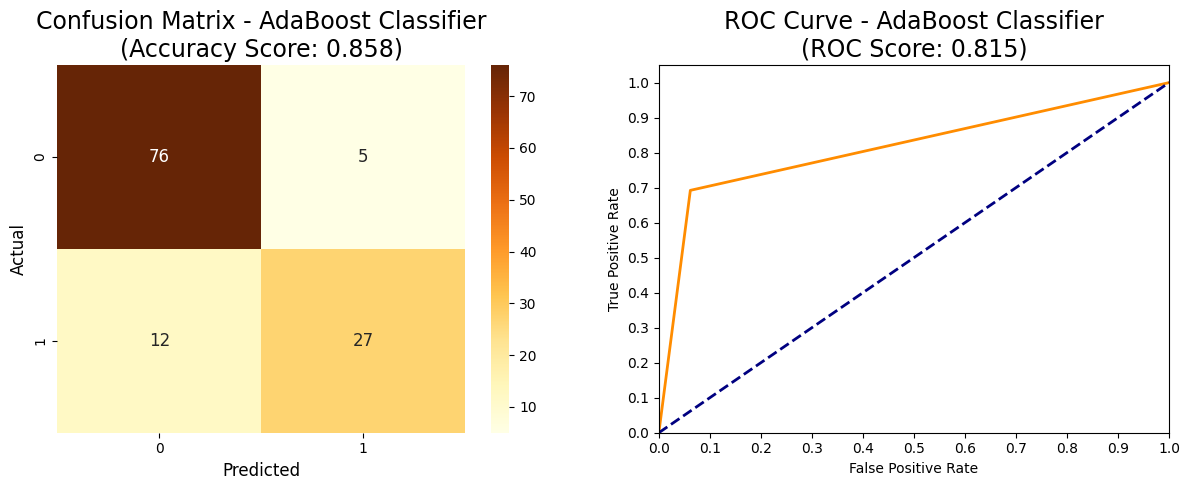

In [ ]:
model_name = "AdaBoost Classifier"
plot_evaluation(y_test, y_pred_ABM, fpr_ABM, tpr_ABM, model_name, cmap='YlOrBr', color='darkorange')

Setelah melakukan evaluasi terhadap model menggunakan AdaBoostClassifier, didapatkan hasil akurasi sebesar 0.858 dan nilai ROC AUC sebesar 0.815

## 3. Stacking
Stacking adalah metode ensemble learning yang melibatkan penggabungan beberapa model machine learning (model-level) untuk membuat model meta (meta-model) yang digunakan untuk menghasilkan prediksi akhir.

### **3.1 Stacking Model 1**
Dalam kode stacking model 1 di bawah ini, terdapat tiga estimator yaitu LogisticRegression, DecisionTreeClassifier, dan KNeighborsClassifier. Model-model ini digabungkan menggunakan StackingClassifier dengan menggunakan LogisticRegression sebagai estimator terakhir. Proses pelatihan melibatkan penggunaan masing-masing estimator untuk membuat prediksi pada data pelatihan, kemudian prediksi-prediksi tersebut digunakan sebagai fitur masukan untuk final_estimator.

In [ ]:
estimators_1 = [
    ('logistic', LogisticRegression()),
    ('tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

stacking_model_1 = StackingClassifier(estimators=estimators_1, final_estimator=LogisticRegression())
stacking_model_1.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('tree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_S1 = stacking_model_1.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S1)
print("Accuracy Score:", accuracy)

fpr_S1, tpr_S1, thresholds = roc_curve(y_test, y_pred_S1)
print('ROC AUC Score: {}'.format(auc(fpr_S1, tpr_S1)))

Accuracy Score: 0.85
ROC AUC Score: 0.8157644824311492


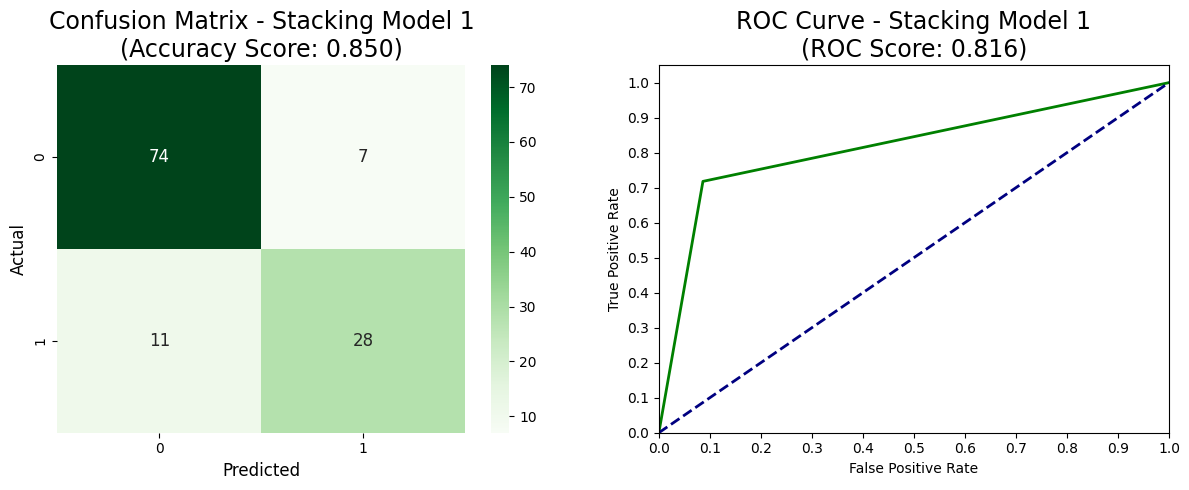

In [ ]:
model_name = "Stacking Model 1"
plot_evaluation(y_test, y_pred_S1, fpr_S1, tpr_S1, model_name, cmap='Greens', color='green')

Berdasarkan evaluasi model menggunakan stacking model dengan tiga estimator, yaitu LogisticRegression, DecisionTreeClassifier, dan KNeighborsClassifier, dan final_estimator berupa LogisticRegression, diperoleh nilai akurasi sebesar 0.85 dan nilai ROC AUC sebesar 0.816. 


### **3.2 Stacking Model 2**

Dalam kode stacking model 2 di bawah ini, terdapat dua estimator yaitu RandomForestClassifier dengan 50 pohon keputusan dan SVC dengan StandardScaler sebagai preprocessor. Model-model ini digabungkan menggunakan StackingClassifier dengan menggunakan LogisticRegression sebagai estimator terakhir. Proses pelatihan melibatkan penggunaan masing-masing estimator untuk membuat prediksi pada data pelatihan, kemudian prediksi-prediksi tersebut digunakan sebagai fitur masukan untuk final_estimator.

In [ ]:
estimators_2 =  [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=24)),
    ('svc', make_pipeline(StandardScaler(), SVC(random_state=24)))
]

final_estimator = LogisticRegression(random_state=24)
stacking_model_2 = StackingClassifier(estimators=estimators_2, final_estimator=final_estimator)
stacking_model_2.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=24)),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(random_state=24))]))],
                   final_estimator=LogisticRegression(random_state=24))

In [ ]:
y_pred_S2 = stacking_model_2.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S2)
print("Accuracy Score:", accuracy)

fpr_S2, tpr_S2, thresholds = roc_curve(y_test, y_pred_S2)
print('ROC AUC Score: {}'.format(auc(fpr_S2, tpr_S2)))

Accuracy Score: 0.8333333333333334
ROC AUC Score: 0.8034188034188035


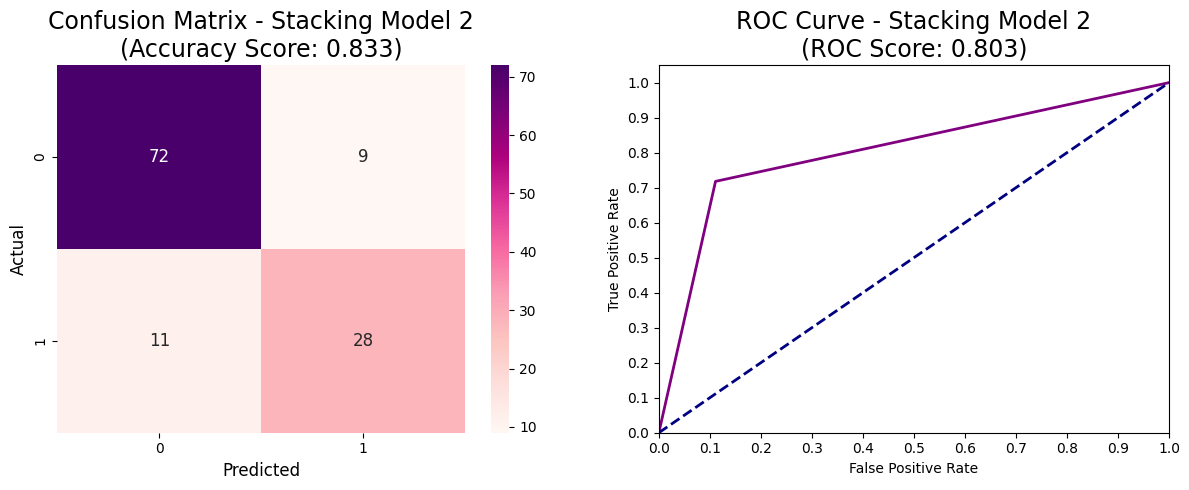

In [ ]:
model_name = "Stacking Model 2"
plot_evaluation(y_test, y_pred_S2, fpr_S2, tpr_S2, model_name, cmap='RdPu', color='purple')

Berdasarkan evaluasi model menggunakan kode stacking model 2, diperoleh nilai akurasi sebesar 0.833 dan nilai ROC AUC sebesar 0.803.

### **3.3 Stacking Model 3**

Pada kode di bawah ini digunakan tiga estimator, yaitu RandomForestClassifier dan KNeighborsClassifier, yang digabungkan menggunakan StackingClassifier. Estimator-estimator tersebut digunakan untuk membuat prediksi pada data pelatihan, dan prediksi-prediksi tersebut kemudian digunakan sebagai fitur masukan untuk final_estimator, yang dalam kasus ini adalah MLPClassifier.

In [ ]:
estimators_3 =  [
    ('rf', RandomForestClassifier(n_estimators=40, random_state=42)),
    ('knn', KNeighborsClassifier())
]
final_estimator = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
stacking_model_3 = StackingClassifier(estimators=estimators_3, final_estimator=final_estimator)
stacking_model_3.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=40,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(100, 100),
                                                 max_iter=1000,
                                                 random_state=42))

In [ ]:
y_pred_S3 = stacking_model_3.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_S3)
print("Accuracy Score:", accuracy)

fpr_S3, tpr_S3, thresholds = roc_curve(y_test, y_pred_S3)
print('ROC AUC Score: {}'.format(auc(fpr_S3, tpr_S3)))

Accuracy Score: 0.8666666666666667
ROC AUC Score: 0.8613485280151947


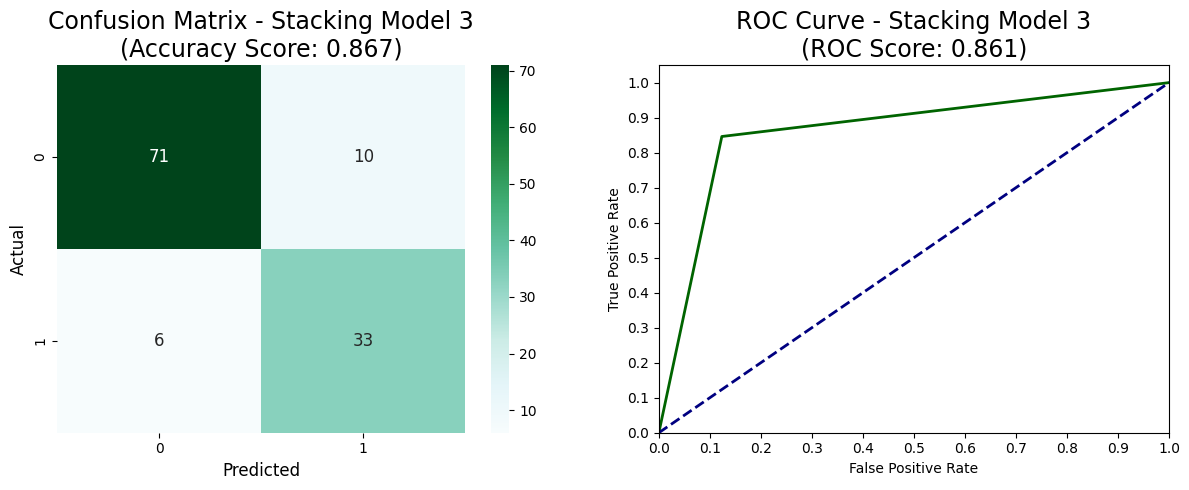

In [ ]:
model_name = "Stacking Model 3"
plot_evaluation(y_test, y_pred_S3, fpr_S3, tpr_S3, model_name, cmap='BuGn', color='darkgreen')

Dari hasil evaluasi model menggunakan kode di atas, diperoleh nilai akurasi sebesar 0.867 dan nilai ROC AUC sebesar 0.861. Hal ini menunjukkan bahwa model stacking dengan penggunaan estimator RandomForestClassifier, KNeighborsClassifier, dan final_estimator MLPClassifier memiliki performa yang baik dalam mengklasifikasikan data. Model ini berhasil mencapai tingkat akurasi yang relatif tinggi dan memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

## **Hyperparameter Tuning - Random Forest** 

In [ ]:
# Initializing the Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=10)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 5, 10],               # Maximum depth of the trees
    'max_features': ['sqrt', 'log2'],         # Number of features to consider
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']          # Split criterion
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)
best_rf = grid_search.best_estimator_
y_best_RF = best_rf.predict(X_test_transformed)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


### Initializing Random Forest model with the best parameters

In [ ]:
bestRF = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None,
                                max_features='sqrt', min_samples_leaf=4,
                                min_samples_split=10, random_state=25)

bestRF.fit(X_train_transformed, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=25)

In [ ]:
y_bestRF = bestRF.predict(X_test_transformed)

# Model Evaluation
accuracy = accuracy_score(y_test, y_bestRF)
print("Accuracy Score:", accuracy)

fpr_bRF, tpr_bRF, thresholds = roc_curve(y_test, y_bestRF)
print('ROC AUC Score: {}'.format(auc(fpr_bRF, tpr_bRF)))

Accuracy Score: 0.8583333333333333
ROC AUC Score: 0.8352326685660019


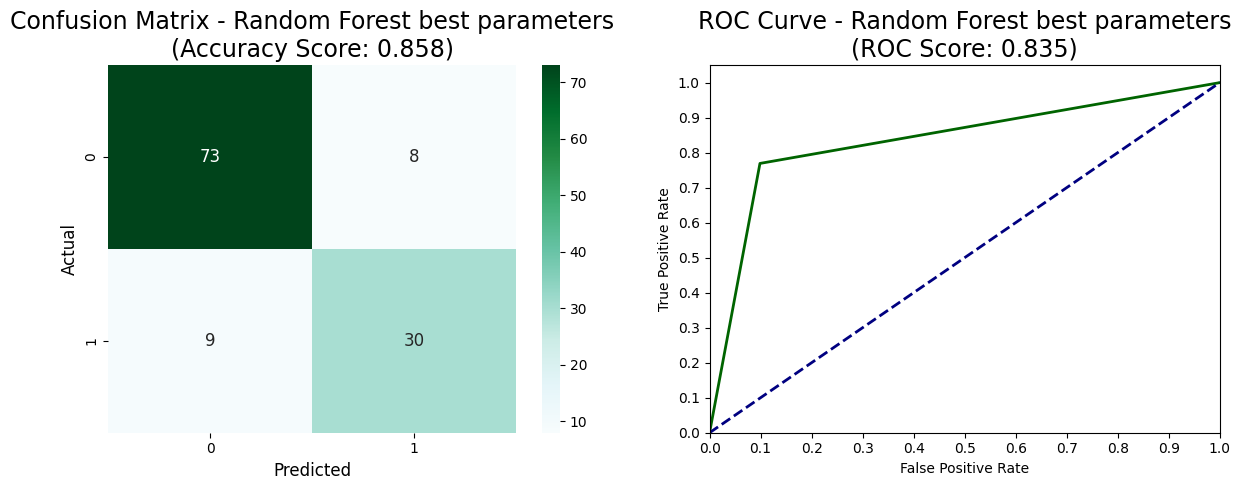

In [ ]:
model_name = "Random Forest best parameters"
plot_evaluation(y_test, y_bestRF, fpr_bRF, tpr_bRF, model_name, cmap='BuGn', color='darkgreen')

Berdasarkan parameter terbaik yang diperoleh, model Random Forest mencapai skor akurasi sebesar 0,858 dan skor ROC AUC sebesar 0,835.

Oleh karena itu, berdasarkan metrik evaluasi tersebut, dapat disimpulkan bahwa model Random Forest yang dilatih dengan parameter terbaik menunjukkan kinerja prediksi yang baik dalam mengklasifikasikan data.

# Kesimpulan

1. Dari 12 atribut yang ada, diambil 7 atribut yang paling berpengaruh dalam memprediksi kematian akibat gagal jantung, diantaranya adalah age, creatinine_phosphokinase, ejection_fraction, platelets,serum_creatinine, serum_sodium, dan time.
2. Dataset ini tidak seimbang serta hanya memiliki jumlah data yang sangat rendah dengan proporsi tingkat kasus pasien yang selamat sebanyak 67.9% dan kasus pasien yang meninggal sebanyak 32.1%. Hal ini menyebabkan prediksi dan visualisasi akan menjadi bias terhadap kasus pasien yang selamat.
3. Model yang digunakan pada final project 3 ini adalah ensemble model. Berdasarkan model dan prediksi yang sudah dibuat, didapatkan nilai akurasi dan ROC AUC dari setiap model, berikut rinciannya:
  ##  Bagging Model
    1. Random Forest
      - Accuracy: 0.867
      - ROC AUC: 0.848
    2. Bagging Classifier
      - Accuracy: 0.825
      - ROC AUC: 0.804
  
  ##  Boosting Model
    1. Gradient Boosting
      - Accuracy: 0.842
      - ROC AUC: 0.8096
    2. AdaBoosting
      - Accuracy: 0.858
      - ROC AUC: 0.815

  ##  Stacking Model
    1. Stacking Model 1
      - Accuracy: 0.85
      - ROC AUC: 0.816
    2. Stacking Model 2
      - Accuracy: 0.833
      - ROC AUC: 0.803
    3. Stacking Model 3
      - Accuracy: 0.867
      - ROC AUC: 0.861

  ##  Hyperparameter Tuning - Random Forest
      - Accuracy: 0.858
      - ROC AUC: 0.835



  
Dari hasil tersebut, dapat dilihat bahwa:

  - Random Forest dari Bagging Model memiliki akurasi dan ROC AUC yang tertinggi, yaitu 0.867 dan 0.848 secara berturut-turut.
  - Stacking Model 3 juga memiliki skor yang tinggi, dengan akurasi sebesar 0.867 dan ROC AUC sebesar 0.861.

  Dalam memilih model terbaik, dapat mempertimbangkan faktor-faktor lain seperti kecepatan pelatihan, kompleksitas model, dan interpretasi hasil. Namun, berdasarkan skor yang diberikan, Random Forest dari Bagging Model dan Stacking Model 3 merupakan model-model yang layak dipertimbangkan untuk performa yang baik dalam memprediksi keselamatan pasien terhadap penyakit jantung pada dataset tersebut.